# 绘制论文所需图表

In [1]:
from pathlib import Path
import sys
import os
root_dir = str(Path(os.getcwd()).parent)
sys.path.append(root_dir)

import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## 财报发布时间分布

In [3]:
yysj = pq.read_table(f'{root_dir}/data/intermediate_results/yysj.parquet').to_pandas()
yysj_pro = pq.read_table(f'{root_dir}/data/intermediate_results/yysj_pro.parquet').to_pandas()
yysj_pro.groupby('type')['days_to_deadline'].mean()

type
0331     3.968709
0630     8.126717
0930     3.793907
1231    21.178427
Name: days_to_deadline, dtype: float64

In [4]:
(yysj['首次预约时间'] == yysj['实际披露时间']).sum() / len(yysj['首次预约时间'])

0.9064654822746816

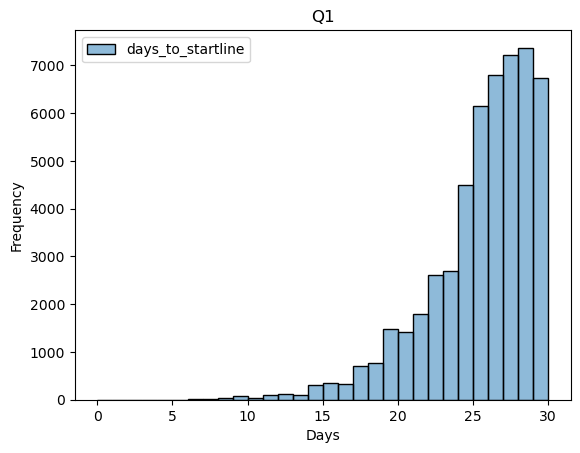

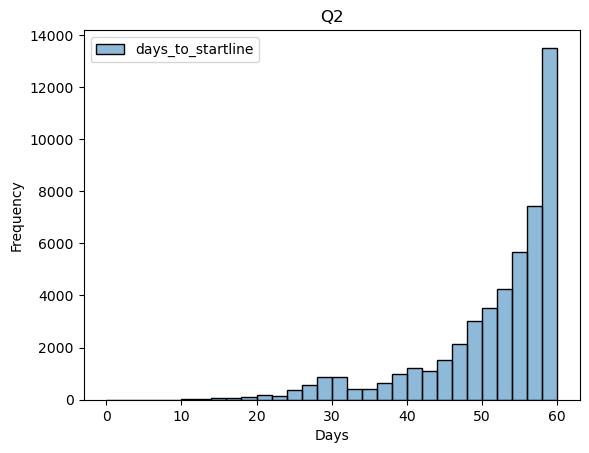

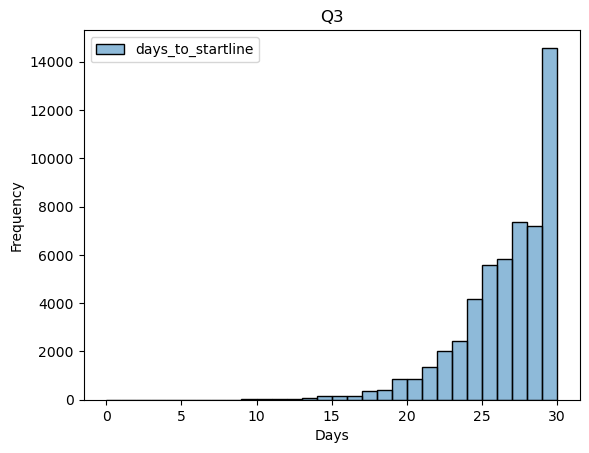

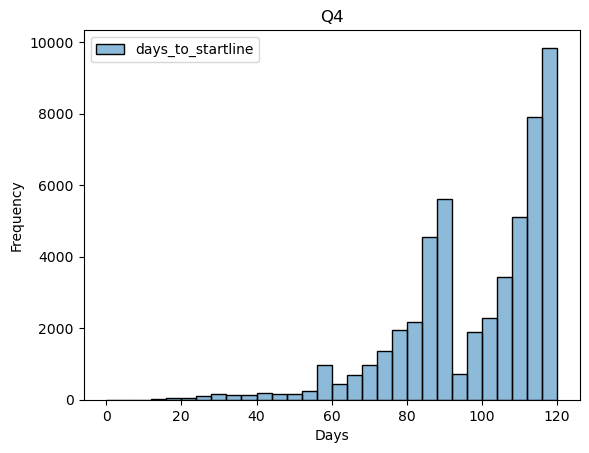

In [5]:
# 一季报
sns.histplot(yysj_pro.loc[yysj_pro['type']=='0331', ['days_to_startline']], bins=30, binrange=(0,30))
plt.title("Q1")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# 半年报
sns.histplot(yysj_pro.loc[yysj_pro['type']=='0630', ['days_to_startline']], bins=30, binrange=(0,60))
plt.title("Q2")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# 三季报
sns.histplot(yysj_pro.loc[yysj_pro['type']=='0930', ['days_to_startline']], bins=30, binrange=(0,30))
plt.title("Q3")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# 年报
sns.histplot(yysj_pro.loc[yysj_pro['type']=='1231', ['days_to_startline']], bins=30, binrange=(0,120))
plt.title("Q4")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


## 根据财报性质划分

In [2]:
factor_data_fundamentall = pq.read_table(f'{root_dir}/data/intermediate_results/factor_data_fundamentall.parquet').to_pandas()
factor_data_fundamentall

,stock_symbol,report_type,asset,equity,net_profit,basic_earnings_per_share,size,roe,ue,ia,report_type_lag1
0,000001,19911231,4.354460e+09,5.779600e+08,NaN,NaN,22.194466,NaN,NaN,NaN,19910930
1,000001,19921231,7.522847e+09,5.456622e+08,NaN,NaN,22.741211,NaN,NaN,NaN,19920930
2,000001,19931231,9.337871e+09,1.189130e+09,2.733111e+08,NaN,22.957344,0.229841,NaN,NaN,19930930
3,000001,19940630,1.246595e+10,1.512913e+09,NaN,NaN,23.246267,NaN,NaN,NaN,19940331
4,000001,19941231,1.548841e+10,1.659833e+09,3.563280e+08,NaN,23.463358,0.214677,NaN,2.556908,19940930
...,...,...,...,...,...,...,...,...,...,...,...
338843,920019,20240930,1.259091e+09,7.423134e+08,3.164510e+07,NaN,20.953656,0.042630,NaN,0.767093,20240630
338844,920088,20240930,5.812421e+08,5.056478e+08,3.181170e+07,NaN,20.180678,0.062913,NaN,0.489580,20240630
338845,920099,20240930,8.020667e+08,7.580631e+08,6.518883e+07,NaN,20.502702,0.085994,NaN,0.765956,20240630
338846,920118,20240630,1.118436e+09,4.555119e+08,3.805434e+07,NaN,20.835197,0.083542,NaN,1.415609,20240331


In [4]:
yysj_pro = pq.read_table(f'{root_dir}/data/intermediate_results/yysj_pro.parquet').to_pandas()
yysj_pro

,stock_symbol,report_type,type,book_time_rank_first,book_time_rank_last,report_time_rank_last,days_to_startline,days_to_deadline
0,000001,20061231,1231,0.280000,0.280000,0.280784,80,39
1,000002,20061231,1231,0.247843,0.247843,0.247843,78,41
2,000004,20061231,1231,0.873725,0.873725,0.874510,116,3
3,000006,20061231,1231,0.309804,0.309804,0.309804,82,37
4,000007,20061231,1231,0.734118,0.734118,0.737255,109,10
...,...,...,...,...,...,...,...,...
209547,688799,20240930,0930,0.355142,0.350833,0.350833,28,2
209548,688800,20240930,0930,0.100686,0.100881,0.100881,24,6
209549,688819,20240930,0930,0.529481,0.526543,0.526543,29,1
209550,688981,20240930,0930,0.999412,0.999412,0.999412,38,-8


In [10]:
data = pd.merge(left=yysj_pro, right=factor_data_fundamentall[['stock_symbol', 'report_type', 'ue']], on=['stock_symbol', 'report_type'], how='left')
data

,stock_symbol,report_type,type,book_time_rank_first,book_time_rank_last,report_time_rank_last,days_to_startline,days_to_deadline,ue
0,000001,20061231,1231,0.280000,0.280000,0.280784,80,39,3.187500
1,000002,20061231,1231,0.247843,0.247843,0.247843,78,41,NaN
2,000004,20061231,1231,0.873725,0.873725,0.874510,116,3,NaN
3,000006,20061231,1231,0.309804,0.309804,0.309804,82,37,NaN
4,000007,20061231,1231,0.734118,0.734118,0.737255,109,10,NaN
...,...,...,...,...,...,...,...,...,...
209547,688799,20240930,0930,0.355142,0.350833,0.350833,28,2,0.000000
209548,688800,20240930,0930,0.100686,0.100881,0.100881,24,6,0.116667
209549,688819,20240930,0930,0.529481,0.526543,0.526543,29,1,-0.142045
209550,688981,20240930,0930,0.999412,0.999412,0.999412,38,-8,-0.260870


In [ ]:
# 一季报
sns.histplot(data.loc[(data['type']=='0331') & (data['ue']>=0), ['days_to_startline']], bins=30, binrange=(0,30), label='good')
sns.histplot(data.loc[(data['type']=='0331') & (data['ue']<0), ['days_to_startline']], bins=30, binrange=(0,30) label='bad')
plt.title("Q1")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 半年报
sns.histplot(yysj_pro.loc[yysj_pro['type']=='0630', ['days_to_startline']], bins=30, binrange=(0,60))
plt.title("Q2")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# 三季报
sns.histplot(yysj_pro.loc[yysj_pro['type']=='0930', ['days_to_startline']], bins=30, binrange=(0,30))
plt.title("Q3")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# 年报
sns.histplot(yysj_pro.loc[yysj_pro['type']=='1231', ['days_to_startline']], bins=30, binrange=(0,120))
plt.title("Q4")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


## 预检验

In [2]:
trade_date_lag = pq.read_table(f'{root_dir}/data/intermediate_results/trade_date_lag.parquet').to_pandas()
yysj_pro = pq.read_table(f'{root_dir}/data/intermediate_results/yysj_pro.parquet').to_pandas()
return_data = pq.read_table(f'{root_dir}/data/intermediate_results/return_data.parquet').to_pandas()

data1 = pd.merge(left=trade_date_lag, right=yysj_pro[['stock_symbol','report_type', 'book_time_rank_first', 'book_time_rank_last', 'report_time_rank_last']], on=['stock_symbol','report_type'], how='left')

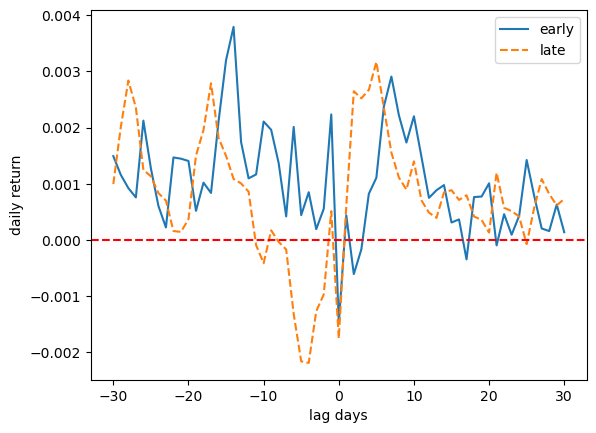

In [3]:
# 早
early = data1.loc[data1['book_time_rank_first']<0.2]
early = pd.merge(left=early, right=return_data, on=['stock_symbol','trade_date'], how='left')
early = early.dropna()
early_rets = early.groupby('lag')['rets2'].mean()
# 晚
late = data1.loc[data1['book_time_rank_first']>0.2]
late = pd.merge(left=late, right=return_data, on=['stock_symbol','trade_date'], how='left')
late = late.dropna()
late_rets = late.groupby('lag')['rets2'].mean()


plt.plot(early_rets, label='early')
plt.plot(late_rets, '--', label='late')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("lag days")
plt.ylabel("daily return")
plt.legend()
plt.show()

## 交易量

In [2]:
trade_date_lag = pq.read_table(f'{root_dir}/data/intermediate_results/trade_date_lag.parquet').to_pandas()
factor_data_tech = pq.read_table(f'{root_dir}/data/intermediate_results/factor_data_tech.parquet').to_pandas()

abnormal_volume_data = pd.merge(left=trade_date_lag.loc[trade_date_lag['lag']==-10],
                                right=factor_data_tech,
                                on=['stock_symbol', 'trade_date'],
                                how='left')
abnormal_volume_data

,stock_symbol,report_type,trade_date,lag,state,rets1,rets2,close,pre_close,volume,amount,float_market_cap,market_cap,turnonver,vol5,volt20,mtm,turnonver2_6,turnonver12_61,abnormal_volume
0,000001,20061231,2007-03-08,-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000002,20061231,2007-03-06,-10,1.0,-0.000654,-0.000654,15.29,15.30,54035220.0,8.232965e+08,4.975780e+07,5.843839e+07,1.085965,1.218996,0.909073,-0.058498,1.354974,1.496721,0.905295
2,000004,20061231,2007-04-13,-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000006,20061231,2007-03-12,-10,1.0,-0.000730,-0.000730,13.69,13.70,7374772.0,1.004777e+08,2.992674e+06,3.471669e+06,2.464275,2.937024,0.784582,0.052267,3.423222,3.265127,1.048419
4,000007,20061231,2007-04-06,-10,1.0,0.001905,0.001905,5.26,5.25,8957607.0,4.701924e+07,6.361058e+05,9.729178e+05,14.081945,11.220742,0.350201,-0.016822,10.532056,19.332209,0.544793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209548,688799,20240930,2024-10-15,-10,1.0,-0.023945,-0.023945,42.80,43.85,512096.0,2.229948e+07,4.014640e+06,4.014640e+06,0.127557,0.277372,3.817362,0.082448,0.413466,0.112499,3.675281
209549,688800,20240930,2024-10-11,-10,1.0,-0.142022,-0.142022,30.81,35.91,9634946.0,3.130870e+08,4.880916e+06,4.880916e+06,1.974004,2.064280,5.595555,0.552141,1.756896,0.437802,4.012991
209550,688819,20240930,2024-10-16,-10,1.0,-0.016164,-0.016164,31.65,32.17,2958197.0,9.409431e+07,3.076696e+07,3.076696e+07,0.096148,0.137049,3.466183,0.136037,0.173605,0.096997,1.789793
209551,688981,20240930,2024-10-25,-10,1.0,-0.009095,-0.009095,93.70,94.56,110646384.0,1.048122e+10,1.863093e+08,1.863093e+08,0.593886,0.872298,18.788189,0.348590,0.987173,0.242974,4.062868


In [3]:
reg_data_after = pq.read_table(f'{root_dir}/data/reg_data/reg_data_after.parquet').to_pandas()
reg_data_after

,stock_symbol,report_type,trade_date,lag,state,rets1,rets2,close,pre_close,volume,...,ia,report_type_lag1,bm,type,book_time_rank_first,book_time_rank_last,report_time_rank_last,days_to_startline,days_to_deadline,listed_date
0,000001,20061231,2007-02-01,-30,NaN,NaN,NaN,NaN,NaN,NaN,...,0.172053,20060930,NaN,1231,0.280000,0.280000,0.280784,80.0,39.0,1991-04-03
1,000002,20061231,2007-01-30,-30,1.0,-0.062673,-0.062673,16.90,18.03,91582843.0,...,1.245806,20060930,383.939339,1231,0.247843,0.247843,0.247843,78.0,41.0,1991-01-29
2,000004,20061231,2007-03-16,-30,NaN,NaN,NaN,NaN,NaN,NaN,...,0.309927,20060930,NaN,1231,0.873725,0.873725,0.874510,116.0,3.0,1991-01-14
3,000006,20061231,2007-02-05,-30,1.0,0.010714,0.010714,11.32,11.20,6013728.0,...,0.142924,20060930,973.370506,1231,0.309804,0.309804,0.309804,82.0,37.0,1992-04-27
4,000007,20061231,2007-03-09,-30,1.0,0.057644,0.057644,4.22,3.99,12979270.0,...,-0.143297,20060930,851.191627,1231,0.734118,0.734118,0.737255,109.0,10.0,1992-04-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12782728,688799,20240930,2024-12-10,30,1.0,-0.007729,-0.007729,41.08,41.40,1265099.0,...,0.121729,20240630,617.644683,0930,0.355142,0.350833,0.350833,28.0,2.0,2021-07-13
12782729,688800,20240930,2024-12-06,30,1.0,-0.032621,-0.032621,42.11,43.53,5025279.0,...,0.194174,20240630,588.431755,0930,0.100686,0.100881,0.100881,24.0,6.0,2021-07-22
12782730,688819,20240930,2024-12-11,30,1.0,0.009672,0.009672,29.23,28.95,2574608.0,...,0.123769,20240630,1599.417774,0930,0.529481,0.526543,0.526543,29.0,1.0,2021-01-18
12782731,688981,20240930,2024-12-20,30,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.014099,20240630,NaN,0930,0.999412,0.999412,0.999412,38.0,-8.0,2020-07-16


In [4]:
reg_data_after.loc[(reg_data_after['lag']==5), 'abnormal_volume'].mean()

1.180605592622737

In [5]:
reg_data_after.loc[(reg_data_after['lag']==5)&(reg_data_after['ue']>=140), 'abnormal_volume'].mean()

1.2358430499961401

In [6]:
reg_data_after.loc[(reg_data_after['lag']==5)&(reg_data_after['ue']<140), 'abnormal_volume'].mean()

1.1261343491985571

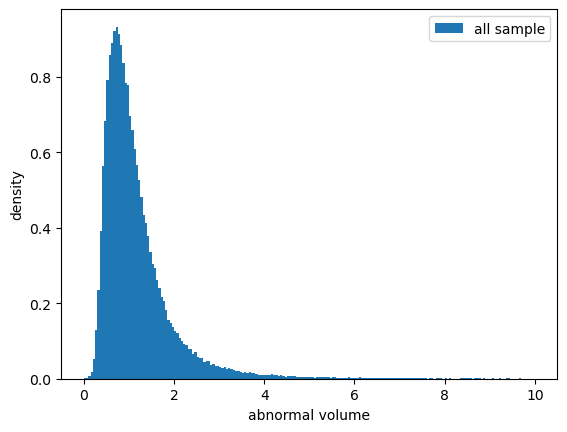

In [7]:
plt.hist(reg_data_after.loc[reg_data_after['lag']==5, 'abnormal_volume'], bins=200, range=(0,10), density = True,label='all sample')
plt.legend()
# plt.axvline(x=1, color='red', linestyle='--')
plt.xlabel("abnormal volume")
plt.ylabel("density")
plt.show()

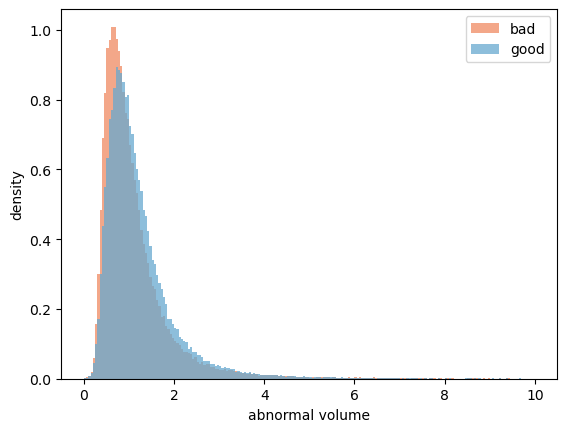

In [24]:

plt.hist(reg_data_after.loc[(reg_data_after['lag']==5)&(reg_data_after['ue']<140), 'abnormal_volume'], bins=200, range=(0,10), density = True, alpha=0.75, label='bad', color='#ef8a62')
plt.hist(reg_data_after.loc[(reg_data_after['lag']==5)&(reg_data_after['ue']>=140), 'abnormal_volume'], bins=200, range=(0,10), density = True, alpha=0.75, label='good', color='#67a9cf')
plt.legend()
# plt.axvline(x=1, color='red', linestyle='--')
plt.xlabel("abnormal volume")
plt.ylabel("density")
plt.show()